In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [8]:
df = pd.read_csv("../../data/encoded_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100244 entries, 0 to 100243
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   admission_type_id         100244 non-null  int64  
 1   discharge_disposition_id  100244 non-null  int64  
 2   admission_source_id       100244 non-null  int64  
 3   time_in_hospital          100244 non-null  int64  
 4   medical_specialty         100244 non-null  int64  
 5   num_lab_procedures        100244 non-null  int64  
 6   num_procedures            100244 non-null  int64  
 7   num_medications           100244 non-null  int64  
 8   number_outpatient         100244 non-null  int64  
 9   number_emergency          100244 non-null  int64  
 10  number_inpatient          100244 non-null  int64  
 11  diag_1                    100244 non-null  int64  
 12  diag_2                    100244 non-null  int64  
 13  diag_3                    100244 non-null  i

In [9]:
X = df.drop(columns=["readmitted"])  # Features
y = df["readmitted"]  # Target variable

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
# random forest classifier model
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [12]:
# predict target
y_pred = rf_classifier.predict(X_test)

In [13]:
# evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.6045
Confusion Matrix:
[[8035 2686]
 [5244 4084]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.75      0.67     10721
           1       0.60      0.44      0.51      9328

    accuracy                           0.60     20049
   macro avg       0.60      0.59      0.59     20049
weighted avg       0.60      0.60      0.59     20049



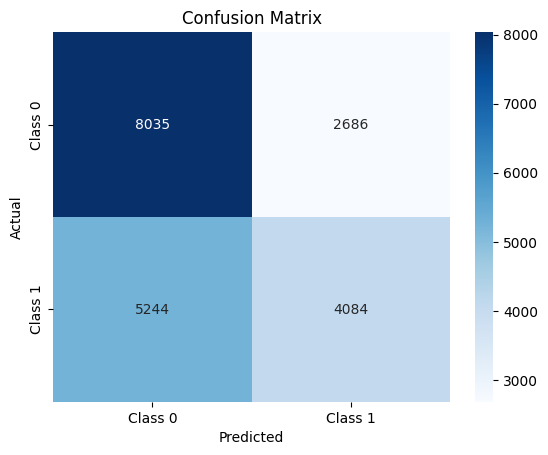

In [20]:
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Class 0", "Class 1"],
    yticklabels=["Class 0", "Class 1"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()